In [1]:
# load libraries

library(tidyverse)
library(readr)
library(ggplot2)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




# (1) Data Description:

This dataset provides a comprehensive look at Airbnb prices in Paris, Vienna, and Barcelona. Each listing is evaluated for various attributes such as room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more to capture an in-depth understanding of Airbnb prices on both weekdays and weekends. Using spatial econometric methods, we analyse and identify the determinants of Airbnb prices across these cities. Our dataset includes information such as realSum (the total price of the listing), room_type (private/shared/entire home/apt), host_is_superhost (boolean value indicating if host is a superhost or not), multi (indicator whether listing is for multiple rooms or not), biz (business indicator) , guest_satisfaction_overall (overall rating from guests camparing all listings offered by host ), bedrooms, dist (distance from city center) , lng & lat coordinates for location identification etc. We hope that this data set offers insight into how global markets are affected by social dynamics and geographical factors which in turn determine pricing strategies for optimal profitability!

## Source: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities/data

# (2) Question: 

## How do listing characteristics and location-based factors influence Airbnb rental prices on weekdays versus weekends across Paris, Vienna, and Barcelona?

In this project, I aim to model and explain variations in the total rental price (realSum), which serves as the response variable, using at least the following explanatory variables:
- room_type: private/ shared/ entire home/ apt
- host_is_superhose: boolean alue indicating if host is a superhost or not
- multi: indicator whether listing is for multiple rooms or not
- biz: business indicator
- guest_satisfaction_overall: overall rating from guests from all listings offered by host
- bedrooms: number of bedrooms in the unit
- dist: distance from city center
- lng & lat coordinates for location identification

This dataset, which includes detailed Airbnb listing data from Barcelona, Paris, and Vienna, split by weekday and weekend, allows me to compare how different features impact pricing under varying travel demand patterns.

The main goal is to perform inference to identify and interpret which factors significantly influence price and whether these effects differ between weekdays and weekends. However, I will also assess prediction performance of the fitted regression models to validate the model's utility



# (3) EDA and Visualization

In [2]:
# load the csv files for each city (weekday and weekend)

# IMPORTANT NOTE: Ensure the CSV files are in the "data" directory relative to your working directory
paris_weekday <- read_csv("data/paris_weekdays.csv")
paris_weekend <- read_csv("data/paris_weekends.csv")
vienna_weekday <- read_csv("data/vienna_weekdays.csv")
vienna_weekend <- read_csv("data/vienna_weekends.csv")
barcelona_weekday <- read_csv("data/barcelona_weekdays.csv")
barcelona_weekend <- read_csv("data/barcelona_weekends.csv")

head(paris_weekday)
head(paris_weekend)
head(vienna_weekday)
head(vienna_weekend)
head(barcelona_weekday)
head(barcelona_weekend)

New names:
• `` -> `...1`
Rows: 3130 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 3558 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 1738 Columns: 20
── Column specification ─────────────────

...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,296.1599,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,0.6998206,0.1937094,518.4789,25.23938,1218.6622,71.60803,2.35385,48.86282
1,288.2375,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,2.1000054,0.1072207,873.2170,42.50791,1000.5433,58.79146,2.32436,48.85902
2,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,94,1,3.3023251,0.2347238,444.5561,21.64084,902.8545,53.05131,2.31714,48.87475
3,298.9561,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,9,91,1,0.5475667,0.1959965,542.1420,26.39129,1199.1842,70.46351,2.35600,48.86100
4,247.9262,Entire home/apt,FALSE,FALSE,4,FALSE,0,0,7,82,1,1.1979209,0.1035729,406.9290,19.80916,1070.7755,62.91827,2.35915,48.86648
5,527.0761,Entire home/apt,FALSE,FALSE,4,TRUE,0,0,10,93,1,1.5432015,0.5491303,967.4781,47.09651,1095.8704,64.39284,2.33201,48.85891


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,536.3967,Entire home/apt,FALSE,FALSE,5,FALSE,0,1,9,89,1,1.3512012,0.21234554,390.7768,19.00155,1030.7385,47.55037,2.35900,48.86800
1,290.1016,Private room,FALSE,TRUE,2,TRUE,0,0,10,97,1,0.6998212,0.19371031,518.4783,25.21104,1218.6589,56.21958,2.35385,48.86282
2,445.7545,Entire home/apt,FALSE,FALSE,4,FALSE,0,1,10,100,1,0.9689817,0.29434293,432.6899,21.03958,1069.8948,49.35674,2.36023,48.86375
3,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,94,1,3.3023186,0.23473971,444.5553,21.61653,902.8564,41.65087,2.31714,48.87475
4,266.3342,Entire home/apt,FALSE,FALSE,2,TRUE,0,0,9,88,1,1.4024298,0.05505193,1013.4587,49.27950,1348.0635,62.18931,2.33408,48.85384
5,345.0927,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,9,91,1,0.5475705,0.19600551,542.1394,26.36157,1199.1796,55.32095,2.35600,48.86100


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,250.5668,Entire home/apt,FALSE,FALSE,3,TRUE,1,0,10,99,1,1.732893,0.2126271,118.64683,8.496979,185.09672,4.424871,16.36500,48.22300
1,156.6043,Entire home/apt,FALSE,FALSE,3,FALSE,0,0,10,97,1,4.807912,0.2282531,80.14502,5.739643,85.72760,2.049380,16.33356,48.17459
2,283.0564,Entire home/apt,FALSE,FALSE,5,TRUE,0,1,10,95,2,2.811773,0.2441629,101.24811,7.250957,151.36429,3.618473,16.33600,48.21100
3,301.7554,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,10,94,2,3.240595,0.6104299,92.47394,6.622588,129.86383,3.104489,16.33006,48.20921
4,150.7608,Entire home/apt,FALSE,FALSE,2,TRUE,0,1,10,96,1,2.241146,1.1195067,124.25677,8.898738,154.34897,3.689824,16.38867,48.19104
5,162.4477,Private room,FALSE,TRUE,2,TRUE,1,0,10,99,1,4.611961,0.1999263,52.07794,3.729599,75.51554,1.805254,16.39755,48.24682


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,324.6617,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,10,94,2,3.240613,0.6104498,92.47347,6.622340,129.86288,3.138736,16.33006,48.20921
1,150.7608,Entire home/apt,FALSE,FALSE,2,TRUE,0,1,10,96,1,2.241126,1.1195048,124.25800,8.898538,154.35032,3.730588,16.38867,48.19104
2,196.3397,Entire home/apt,FALSE,FALSE,3,TRUE,0,1,9,91,1,2.371551,0.4524187,125.41313,8.981261,206.64249,4.994469,16.34236,48.20436
3,107.7531,Private room,FALSE,TRUE,2,FALSE,0,0,8,92,1,3.629114,0.4731637,62.45942,4.472931,93.81071,2.267369,16.37837,48.24102
4,196.3397,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,9,94,1,2.395063,0.4436346,124.02036,8.881520,202.31807,4.889950,16.34198,48.20456
5,212.2338,Entire home/apt,FALSE,FALSE,2,TRUE,1,0,10,97,1,2.011143,0.6790809,145.34915,10.408947,237.98831,5.752086,16.34682,48.20620


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,474.3175,Entire home/apt,FALSE,FALSE,4,FALSE,0,1,10,91,1,1.111996,0.63049095,526.4694,17.94293,915.5871,20.15489,2.17556,41.39624
1,169.8978,Private room,FALSE,TRUE,2,TRUE,1,0,10,88,1,1.751839,0.12401717,320.1275,10.91046,794.2774,17.48449,2.14906,41.38714
2,161.9848,Private room,FALSE,TRUE,4,FALSE,0,1,9,88,1,1.670493,0.08032198,344.0739,11.72659,840.6736,18.50581,2.15357,41.37859
3,367.9568,Entire home/apt,FALSE,FALSE,3,FALSE,0,1,10,91,1,1.475847,0.09310686,400.0574,13.63460,946.5899,20.83736,2.16839,41.37390
4,196.8953,Private room,FALSE,TRUE,3,FALSE,1,0,9,91,1,1.855452,0.27248605,346.0422,11.79368,792.2960,17.44087,2.15238,41.37699
5,330.9517,Entire home/apt,FALSE,FALSE,3,FALSE,0,1,9,100,2,2.565611,0.70129045,391.0874,13.32889,525.5139,11.56818,2.18197,41.40842


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,532.0362,Entire home/apt,FALSE,FALSE,4,FALSE,0,1,10,91,1,1.1119980,0.63050396,526.4715,20.32767,915.5915,20.11247,2.17556,41.39624
1,169.8978,Private room,FALSE,TRUE,2,TRUE,1,0,10,88,1,1.7518309,0.12401273,320.1283,12.36052,794.2797,17.44766,2.14906,41.38714
2,196.8953,Private room,FALSE,TRUE,2,FALSE,1,0,9,90,1,0.6217308,0.29751560,503.3540,19.43508,1242.4342,27.29211,2.16500,41.38300
3,141.2712,Private room,FALSE,TRUE,3,FALSE,0,1,9,86,1,1.6483109,0.08944189,342.5958,13.22802,820.9220,18.03290,2.15342,41.37912
4,715.2000,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,9,95,2,0.6935603,0.35765301,537.8031,20.76520,1081.5601,23.75824,2.17498,41.39214
5,173.3889,Private room,FALSE,TRUE,2,FALSE,0,0,9,96,1,1.4742189,0.59051076,448.4062,17.31348,752.7611,16.53563,2.18195,41.39691


In [3]:
# combine the data into one dataframe
# combined_data <- bind_rows(
#   paris_weekday %>% mutate(city = "Paris", day_type = "Weekday"),
#   paris_weekend %>% mutate(city = "Paris", day_type = "Weekend"),
#   vienna_weekday %>% mutate(city = "Vienna", day_type = "Weekday"),
#   vienna_weekend %>% mutate(city = "Vienna", day_type = "Weekend"),
#   barcelona_weekday %>% mutate(city = "Barcelona", day_type = "Weekday"),
#   barcelona_weekend %>% mutate(city = "Barcelona", day_type = "Weekend")
# )

# head(combined_data)

# combine the data into 3 dataframes for each city
paris_data <- bind_rows(
  paris_weekday %>% mutate(day_type = "Weekday"),
  paris_weekend %>% mutate(day_type = "Weekend")
)

vienna_data <- bind_rows(
  vienna_weekday %>% mutate(day_type = "Weekday"),
  vienna_weekend %>% mutate(day_type = "Weekend")
)

barcelona_data <- bind_rows(
  barcelona_weekday %>% mutate(day_type = "Weekday"),
  barcelona_weekend %>% mutate(day_type = "Weekend")
)

head(paris_data)
head(vienna_data)
head(barcelona_data)

...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,⋯,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day_type
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,296.1599,Private room,FALSE,TRUE,2,TRUE,0,0,10,⋯,1,0.6998206,0.1937094,518.4789,25.23938,1218.6622,71.60803,2.35385,48.86282,Weekday
1,288.2375,Private room,FALSE,TRUE,2,TRUE,0,0,10,⋯,1,2.1000054,0.1072207,873.2170,42.50791,1000.5433,58.79146,2.32436,48.85902,Weekday
2,211.3431,Private room,FALSE,TRUE,2,FALSE,0,0,10,⋯,1,3.3023251,0.2347238,444.5561,21.64084,902.8545,53.05131,2.31714,48.87475,Weekday
3,298.9561,Entire home/apt,FALSE,FALSE,2,FALSE,0,1,9,⋯,1,0.5475667,0.1959965,542.1420,26.39129,1199.1842,70.46351,2.35600,48.86100,Weekday
4,247.9262,Entire home/apt,FALSE,FALSE,4,FALSE,0,0,7,⋯,1,1.1979209,0.1035729,406.9290,19.80916,1070.7755,62.91827,2.35915,48.86648,Weekday
5,527.0761,Entire home/apt,FALSE,FALSE,4,TRUE,0,0,10,⋯,1,1.5432015,0.5491303,967.4781,47.09651,1095.8704,64.39284,2.33201,48.85891,Weekday


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,⋯,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day_type
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,250.5668,Entire home/apt,FALSE,FALSE,3,TRUE,1,0,10,⋯,1,1.732893,0.2126271,118.64683,8.496979,185.09672,4.424871,16.36500,48.22300,Weekday
1,156.6043,Entire home/apt,FALSE,FALSE,3,FALSE,0,0,10,⋯,1,4.807912,0.2282531,80.14502,5.739643,85.72760,2.049380,16.33356,48.17459,Weekday
2,283.0564,Entire home/apt,FALSE,FALSE,5,TRUE,0,1,10,⋯,2,2.811773,0.2441629,101.24811,7.250957,151.36429,3.618473,16.33600,48.21100,Weekday
3,301.7554,Entire home/apt,FALSE,FALSE,4,TRUE,0,1,10,⋯,2,3.240595,0.6104299,92.47394,6.622588,129.86383,3.104489,16.33006,48.20921,Weekday
4,150.7608,Entire home/apt,FALSE,FALSE,2,TRUE,0,1,10,⋯,1,2.241146,1.1195067,124.25677,8.898738,154.34897,3.689824,16.38867,48.19104,Weekday
5,162.4477,Private room,FALSE,TRUE,2,TRUE,1,0,10,⋯,1,4.611961,0.1999263,52.07794,3.729599,75.51554,1.805254,16.39755,48.24682,Weekday


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,⋯,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day_type
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,474.3175,Entire home/apt,FALSE,FALSE,4,FALSE,0,1,10,⋯,1,1.111996,0.63049095,526.4694,17.94293,915.5871,20.15489,2.17556,41.39624,Weekday
1,169.8978,Private room,FALSE,TRUE,2,TRUE,1,0,10,⋯,1,1.751839,0.12401717,320.1275,10.91046,794.2774,17.48449,2.14906,41.38714,Weekday
2,161.9848,Private room,FALSE,TRUE,4,FALSE,0,1,9,⋯,1,1.670493,0.08032198,344.0739,11.72659,840.6736,18.50581,2.15357,41.37859,Weekday
3,367.9568,Entire home/apt,FALSE,FALSE,3,FALSE,0,1,10,⋯,1,1.475847,0.09310686,400.0574,13.63460,946.5899,20.83736,2.16839,41.37390,Weekday
4,196.8953,Private room,FALSE,TRUE,3,FALSE,1,0,9,⋯,1,1.855452,0.27248605,346.0422,11.79368,792.2960,17.44087,2.15238,41.37699,Weekday
5,330.9517,Entire home/apt,FALSE,FALSE,3,FALSE,0,1,9,⋯,2,2.565611,0.70129045,391.0874,13.32889,525.5139,11.56818,2.18197,41.40842,Weekday


In [4]:
# check if all the rows in each csv file are included

# nrow(paris_weekday) + nrow(paris_weekend) + nrow(vienna_weekday) + 
#   nrow(vienna_weekend) + nrow(barcelona_weekday) + nrow(barcelona_weekend) == nrow(combined_data)

nrow(paris_data) == nrow(paris_weekday) + nrow(paris_weekend)
nrow(vienna_data) == nrow(vienna_weekday) + nrow(vienna_weekend)
nrow(barcelona_data) == nrow(barcelona_weekday) + nrow(barcelona_weekend)

[1] TRUE

[1] TRUE

[1] TRUE

In [6]:
# list columns and check if they are the same across all dataframes

colnames(paris_data)
colnames(vienna_data)
colnames(barcelona_data)

all(colnames(paris_data) == colnames(vienna_data)) && all(colnames(paris_data) == colnames(barcelona_data))

[1] "...1"                       "realSum"                   
 [3] "room_type"                  "room_shared"               
 [5] "room_private"               "person_capacity"           
 [7] "host_is_superhost"          "multi"                     
 [9] "biz"                        "cleanliness_rating"        
[11] "guest_satisfaction_overall" "bedrooms"                  
[13] "dist"                       "metro_dist"                
[15] "attr_index"                 "attr_index_norm"           
[17] "rest_index"                 "rest_index_norm"           
[19] "lng"                        "lat"                       
[21] "day_type"

[1] "...1"                       "realSum"                   
 [3] "room_type"                  "room_shared"               
 [5] "room_private"               "person_capacity"           
 [7] "host_is_superhost"          "multi"                     
 [9] "biz"                        "cleanliness_rating"        
[11] "guest_satisfaction_overall" "bedrooms"                  
[13] "dist"                       "metro_dist"                
[15] "attr_index"                 "attr_index_norm"           
[17] "rest_index"                 "rest_index_norm"           
[19] "lng"                        "lat"                       
[21] "day_type"

[1] "...1"                       "realSum"                   
 [3] "room_type"                  "room_shared"               
 [5] "room_private"               "person_capacity"           
 [7] "host_is_superhost"          "multi"                     
 [9] "biz"                        "cleanliness_rating"        
[11] "guest_satisfaction_overall" "bedrooms"                  
[13] "dist"                       "metro_dist"                
[15] "attr_index"                 "attr_index_norm"           
[17] "rest_index"                 "rest_index_norm"           
[19] "lng"                        "lat"                       
[21] "day_type"

[1] TRUE

In [7]:
# clean each dataframe

# Create a list of dataframes
city_data_list <- list(
  paris = paris_data,
  vienna = vienna_data,
  barcelona = barcelona_data
)

# Clean all dataframes using a for loop
for (city in names(city_data_list)) {
  city_data_list[[city]] <- city_data_list[[city]] %>%
    select(-1, -attr_index, -rest_index) %>%
    mutate(
      room_type = as.factor(room_type),
      host_is_superhost = as.factor(host_is_superhost),
      multi = as.factor(multi),
      biz = as.factor(biz),
      day_type = as.factor(day_type)
    ) %>%
    filter(realSum <= mean(realSum) + 3*sd(realSum)) %>%
    mutate(price_per_person = realSum/person_capacity) %>%
    mutate(across(c(cleanliness_rating, guest_satisfaction_overall, 
                    dist, metro_dist), scale)) %>%
    na.omit()
}

# Assign the cleaned dataframes back to their original names
paris_data <- city_data_list$paris
vienna_data <- city_data_list$vienna
barcelona_data <- city_data_list$barcelona


In [10]:
install.packages("corrplot")

Installing package into 'C:/Users/quydu/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\quydu\AppData\Local\Temp\RtmpcbtJIt\downloaded_packages



Correlation matrix for paris :




Correlation matrix for vienna :


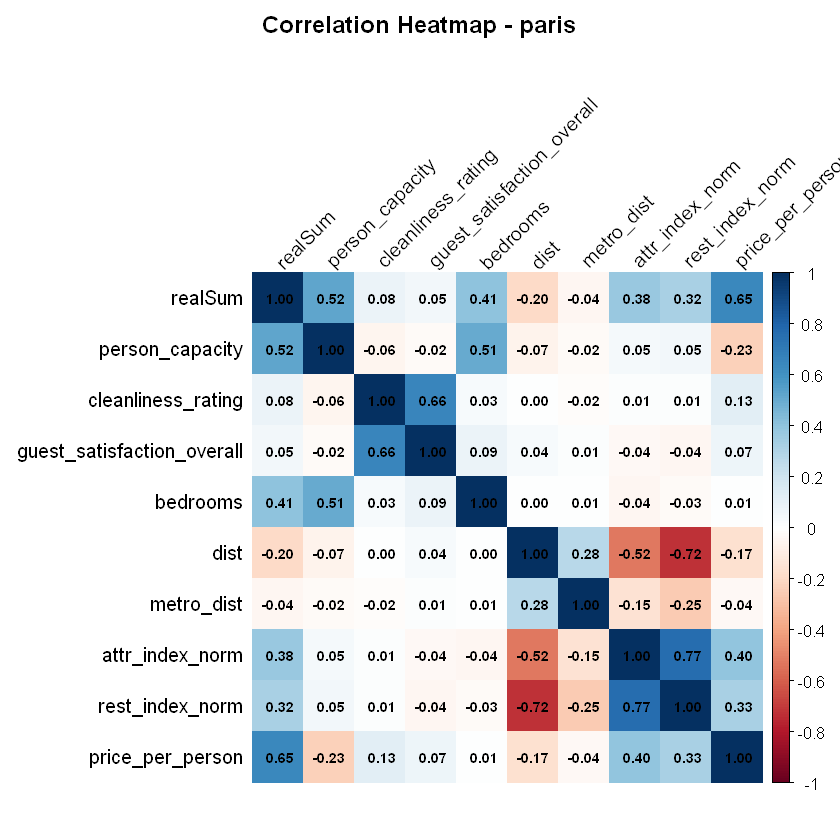



Correlation matrix for barcelona :


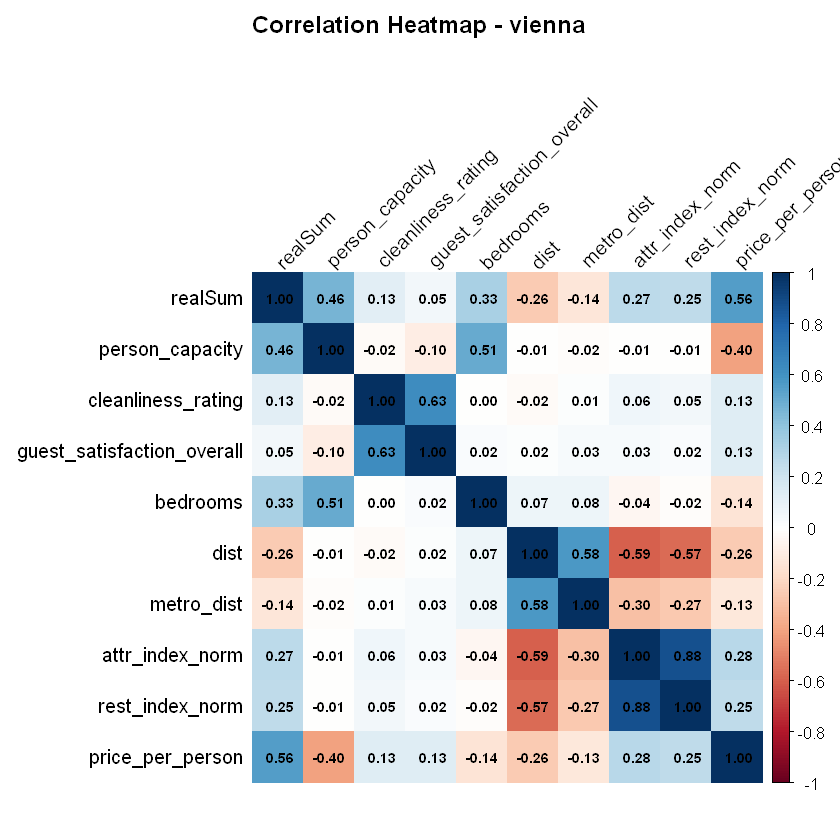

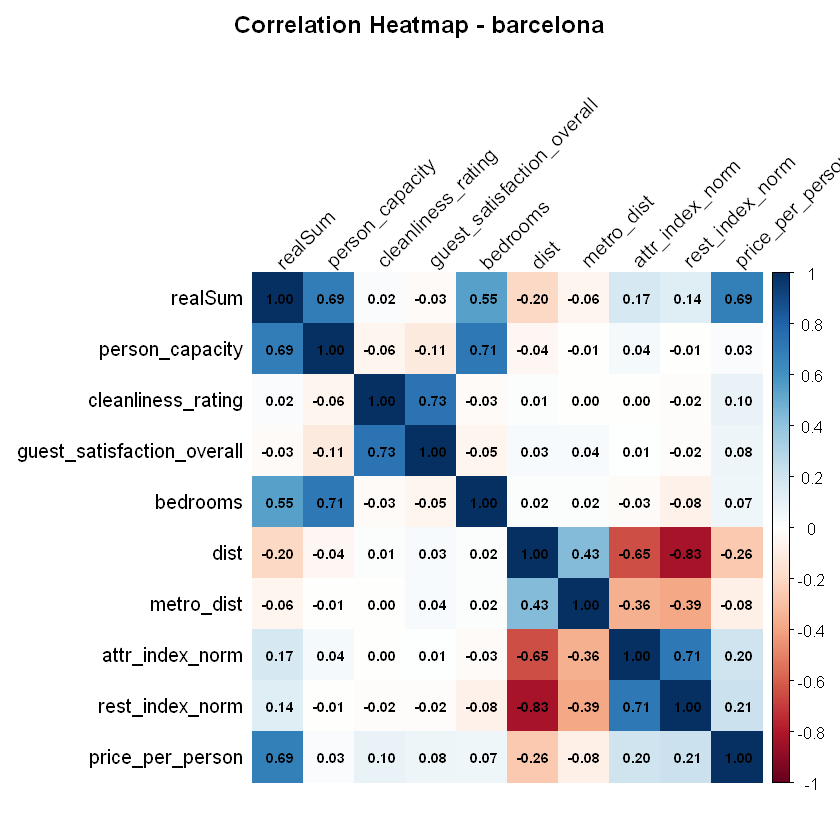

In [12]:
library(corrplot)

# Modify the for loop to create correlation heatmaps
for (city in names(city_data_list)) {
  # Select only numeric columns for correlation
  numeric_cols <- city_data_list[[city]] %>%
    select_if(is.numeric) %>%
    select(-lng, -lat) # excluding coordinates for clarity
  
  # Calculate correlation matrix
  corr_matrix <- cor(numeric_cols, use = "complete.obs")
  
  # Create correlation plot
  cat(paste("\nCorrelation matrix for", city, ":\n"))
  
  # Plot correlation matrix
  corrplot(corr_matrix, 
          method = "color",
          type = "full",
          addCoef.col = "black",
          tl.col = "black",
          tl.srt = 45,
          number.cex = 0.7,
          title = paste("Correlation Heatmap -", city),
          mar = c(0,0,2,0))
  
  # Add some space between plots
  cat("\n")
}

In [17]:
# check if top 6 affected variables are the same across all cities
top_vars_list <- list()

for (city in names(city_data_list)) {
  # Select only numeric columns for correlation
  numeric_cols <- city_data_list[[city]] %>%
    select_if(is.numeric) %>%
    select(-lng, -lat) # excluding coordinates for clarity
  
  # Calculate correlation matrix
  corr_matrix <- cor(numeric_cols, use = "complete.obs")
  
  # Find the top affected variables (e.g., those with high correlation with realSum)
  top_vars <- sort(abs(corr_matrix["realSum", ]), decreasing = TRUE)[-1] # Exclude self-correlation
  
  # Store the top variables in the list
  top_vars_list[[city]] <- names(top_vars)[1:6] # Top 6 variables
}

top_vars_list


$paris
[1] "price_per_person" "person_capacity"  "bedrooms"         "attr_index_norm" 
[5] "rest_index_norm"  "dist"            

$vienna
[1] "price_per_person" "person_capacity"  "bedrooms"         "attr_index_norm" 
[5] "dist"             "rest_index_norm" 

$barcelona
[1] "person_capacity"  "price_per_person" "bedrooms"         "dist"            
[5] "attr_index_norm"  "rest_index_norm"

**Insights**

We see that between these 3 cities, the top 6 affected variables for them are the same (just different in order)

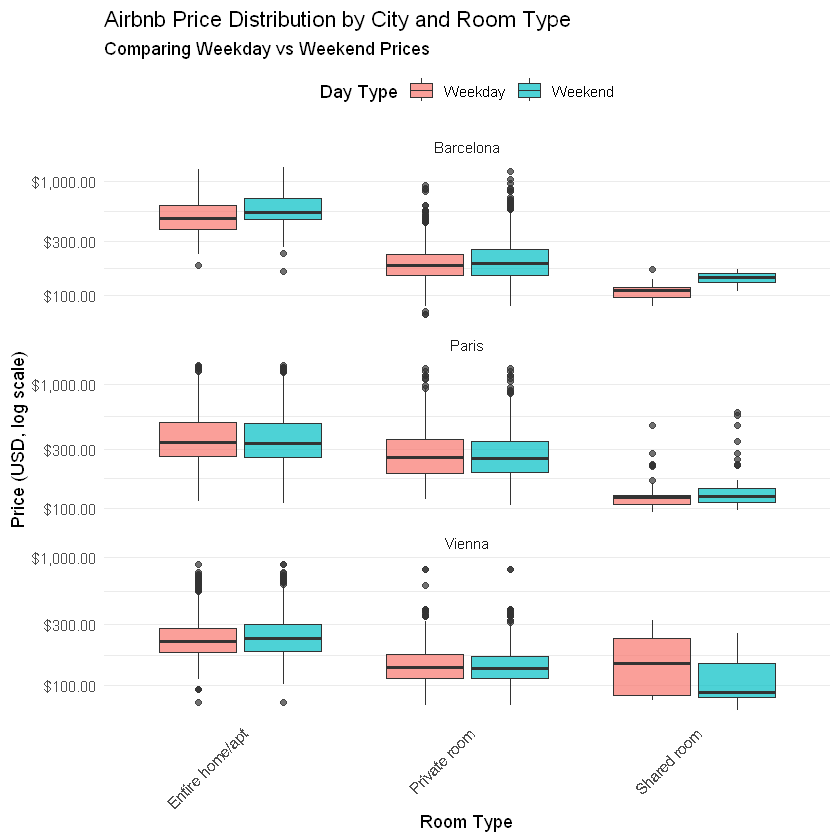

In [ ]:
# Price Distribution by City and Room Type with log scale

ggplot(clean_data, aes(x = room_type, y = realSum, fill = day_type)) +
  geom_boxplot(alpha = 0.7) +
  facet_wrap(~city, scales = "free_y", ncol = 1) +
  scale_y_log10(labels = scales::dollar_format()) +
  labs(
    title = "Airbnb Price Distribution by City and Room Type",
    subtitle = "Comparing Weekday vs Weekend Prices",
    x = "Room Type",
    y = "Price (USD, log scale)",
    fill = "Day Type"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "top",
    panel.grid.major.x = element_blank()  
  )

### Price Distribution Analysis

The boxplot visualization reveals clear pricing hierarchies and patterns across the three cities. Entire homes/apartments consistently command the highest median prices in all cities, with Paris leading the price range, followed by Barcelona, while Vienna offers more affordable options. The spread of prices for entire homes is notably wider, suggesting greater price flexibility in this category.

Private rooms occupy the middle price tier, with remarkably consistent pricing between $100-300 across all three cities. The narrower price ranges for private rooms indicate more standardized pricing in this category, likely due to stronger market competition. Interestingly, the weekend premium for private rooms remains minimal across all cities.

Shared rooms emerge as the most affordable option with the most concentrated price distribution. Barcelona shows a notable weekend premium for shared rooms, while Paris displays an interesting pattern of multiple price tiers in this category. Vienna maintains the most stable pricing between weekdays and weekends across all room types.

The log scale effectively highlights these price variations while revealing that price variability is highest for entire homes in Paris, moderate for private rooms across all cities, and most concentrated for shared rooms. These patterns suggest different market dynamics and pricing strategies across cities and room types, with Paris commanding premium prices, Barcelona showing moderate levels, and Vienna positioning itself as the most affordable

# (4) Methods and Plan

## Proposed Method: Multiple Linear Regression with Interaction Terms

Given our research question about how various listing characteristics and location-based factors influence Airbnb prices across different cities and time periods, I propose using multiple linear regression with interaction terms. The model will use log-transformed price (realSum) as the response variable, given the right-skewed distribution revealed in our EDA.

The base model structure will be:


In [26]:
log(realSum) ~ room_type + host_is_superhost + multi + biz + 
                guest_satisfaction_overall + bedrooms + dist + 
                city + day_type + 
                city:day_type + room_type:day_type

log(realSum) ~ room_type + host_is_superhost + multi + biz + 
    guest_satisfaction_overall + bedrooms + dist + city + day_type + 
    city:day_type + room_type:day_type



## Method Appropriateness

This method aligns well with our research goals because:
1. The log transformation of prices addresses the observed right-skewed distribution
2. Interaction terms (city:day_type, room_type:day_type) allow us to examine how pricing patterns differ between weekdays and weekends across cities and room types
3. Multiple regression can quantify the relative importance of different factors while controlling for others
4. The method provides interpretable coefficients for both categorical and continuous variables

## Required Assumptions

The method requires several key assumptions:
1. Linearity: After log transformation, relationships between predictors and price should be approximately linear
2. Independence: Observations should be independent (may be violated if same properties listed multiple times)
3. Homoscedasticity: Variance of residuals should be constant
4. Normality: Residuals should be approximately normally distributed
5. No multicollinearity: Predictors should not be highly correlated

## Potential Limitations

The proposed method has several limitations:
1. Spatial autocorrelation is not directly addressed - nearby properties may have correlated prices
2. The model assumes additive effects (even with interactions), which may miss complex non-linear relationships
3. Time-based patterns beyond weekday/weekend differences are not captured
4. The log transformation, while helpful for the price distribution, may complicate interpretation
5. The model cannot capture potential seasonal variations or long-term trends in pricing

These limitations could be addressed in future analyses through techniques like spatial regression or time series methods, but the proposed approach provides a solid foundation for understanding the main pricing determinants while maintaining interpretability.